# Why Machine Learning with Spark?

- One of the major attractions of Spark is the ability to **scale computation massively**, and that is exactly what you need for machine learning algorithms. But the **limitation is that all machine learning algorithms cannot be effectively parallelized**. Each algorithm has its own challenges for parallelization, whether it is task parallelism or data parallelism.

- Having said that, Spark is becoming the de-facto platform for building machine learning algorithms and applications. The developers working on the Spark MLlib are implementing more and more machine algorithms in a scalable and concise manner in the Spark framework.


## Companies making Buisness out of SparkMLlib

Many compelling business scenarios and technical solutions are being solved today with Spark MLlib, including [Huawei on Frequent Pattern Mining](https://databricks.com/blog/2015/06/09/huawei-embraces-open-source-apache-spark.html), [OpenTable’s Dining Recommendations](https://www.slideshare.net/SparkSummit/using-data-science-to-transform-opentable-into-delgado-das). Some additional examples:

- [NBC Universal](https://databricks.com/session/use-of-spark-mllib-for-predicting-the-offlining-of-digital-media) stores hundreds of terabytes of media for international cable TV. To save on costs, it takes the media offline when it is unlikely to be used soon. The company uses Spark MLlib Support Vector Machines to predict which files will not be used.

- [The Toyota Customer](https://databricks.com/session/data-driven-toyota-customer-360-insights-on-apache-spark-and-mllib) 360 Insights Platform and Social Media Intelligence Center is powered by Spark MLlib. Toyota uses MLlib to categorize and prioritize social media interactions in real-time.

- [Radius Intelligence](https://pages.databricks.com/CaseStudy-Raidus.html) uses Spark MLlib to process billions of data points from customers and external data sources, including 25 million canonical businesses and hundreds of millions of business listings from various sources.

- [ING](https://databricks.com/session/real-time-anomaly-detection-with-spark-ml-and-akka) uses Spark in its data analytics pipeline for anomaly detection. The company’s machine learning pipeline uses Spark decision tree ensembles and k-means clustering.

### Spark is there in every industry!!

<img src="../images/spark_usecases.jpeg">


## Let's do some Predictive Analysis with Spark MLlib

**What Predictive analysis demands?**
- Predictive analytics answers a question, but to accurately answer that question, you must have reliable historical data.

**Why is this important?**
- Because computers learn from historical data to make their predictions. Think of it like this — thinking of how we learned things (i.e. how we learned colors, animal names), a similar learning process is done in machine learning. Someone taught us color names, identifying animal with names. Similarly, in machine learning, we have to provide accurate examples via historical data so that the **machine learning process learns from the historical data to train a classification model**.



<img src = "../images/ml.jpg">

## Introduction to the problem

We will be solving a classification problem. Using Bank Marketing dataset, the classification goal is to predict whether the client will subscribe (Yes/No) to a term deposit depending on other client related details.

## Introduction to the Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
Attribute Information:

**Input variables: Bank client data**

1 - **age** (numeric)

2 - **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - **default**: has credit in default? (categorical: 'no','yes','unknown')

6 - **housing**: has housing loan? (categorical: 'no','yes','unknown')

7 - **loan**: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - **contact**: contact communication type (categorical: 'cellular','telephone') 

9 - **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the 
output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - **previous**: number of contacts performed before this campaign and for this client (numeric)

15 - **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable: deposit**

In [12]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('../data/bank.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [13]:
df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|unknown|  5| 

### Want to see in a nice formatted table?
Try it out with pandas!

In [14]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Let's check if our data is evenly distributed into these two categories i.e. `yes` and `no`

**Count total clients subscribed with the deposit. In other words  calculate number of client with deposit value as `yes`**

In [15]:
# Hint: Use filter on deposit column
df.filter(df['deposit']=='yes').count()

5289

**Similarly calculate total number of clients who did not subscribed to deposit.**

In [16]:
df.filter(df['deposit']=='no').count()

5873

So, with the counts you can see our data is quite evenly distributed which means the classes are balanced :)

Let's start building model with this.

### Statistics of the dataset

In [17]:
df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

With some observations done, `Day` and `month` columns are not really important in this classification problem. So, we will remove there two columns and create a new dataframe.

In [18]:
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
cols = df.columns

## Standard Workflow

A typical standard machine learning workflow is as follows:

1. Loading data (aka data ingestion)

2. Extracting features (aka feature extraction)

3. Training model (aka model training)

4. Evaluate (or predictionize)

## Preparing Data for Machine Learning

The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

**We will use OneHotEncoderEstimator, StringIndexer, VectorAssembler**

**Need help?**

**1. StringIndexer:** StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels], ordered by label frequencies, so the most frequent label gets index 0. If the input column is numeric, we cast it to string and index the string values. you must set the input column of the component to this string-indexed column name. In many cases, you can set the input column with setInputCol. 

**2. OneHotEncoder:** One-hot Encoding: One-hot encoding maps a column of label indices to a column of binary vectors, with at most a single one-value. This encoding allows algorithms which expect continuous features, such as Logistic Regression, to use categorical features. For example with 5 categories, an input value of 2.0 would map to an output vector of [0.0, 0.0, 1.0, 0.0]. The last category is not included by default because it makes the vector entries sum up to one so an input value of 4.0 maps to [0.0, 0.0, 0.0, 0.0].

**3. VectorAssembler:** VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees.


In [19]:
#StringIndexer Example

from pyspark.ml.feature import StringIndexer

df1 = spark.createDataFrame([(0, "M"), (1, "F"), (2, "F"), (3, "M"), (4, "M"), (5, "M")],["id", "gender"])

indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")

indexed = indexer.fit(df1).transform(df1)

indexed.show()

#OneHotEncoderEstimator

from pyspark.ml.feature import OneHotEncoder, StringIndexer

df1 = spark.createDataFrame([(0, "M"), (1, "F"), (2, "F"), (3, "M"), (4, "M"), (5, "M")],["id", "gender"])

stringIndexer = StringIndexer(inputCol="gender", outputCol="genderIndex")

model = stringIndexer.fit(df1)

indexed = model.transform(df1)

encoder = OneHotEncoder(dropLast=False, inputCol="genderIndex", outputCol="genderVec")

encoded = encoder.transform(indexed)

encoded.select("id", "genderVec").show()



+---+------+-----------+
| id|gender|genderIndex|
+---+------+-----------+
|  0|     M|        0.0|
|  1|     F|        1.0|
|  2|     F|        1.0|
|  3|     M|        0.0|
|  4|     M|        0.0|
|  5|     M|        0.0|
+---+------+-----------+

+---+-------------+
| id|    genderVec|
+---+-------------+
|  0|(2,[0],[1.0])|
|  1|(2,[1],[1.0])|
|  2|(2,[1],[1.0])|
|  3|(2,[0],[1.0])|
|  4|(2,[0],[1.0])|
|  5|(2,[0],[1.0])|
+---+-------------+



In [20]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

**Let's look in detail what's happening**

- It indexes each categorical column using the StringIndexer, then converts the indexed categories into one-hot encoded variables. 

- The resulting output has the binary vectors appended to the end of each row. We use the StringIndexer again to encode our labels to label indices.

- Next, we use the VectorAssembler to combine all the feature columns into a single vector column.



Want more help in understanding `OneHotEncoderEstimator`?

**Excellent explanation given in below link:**

-> **[OneHotEncoderEstimator](https://stackoverflow.com/questions/42295001/how-to-interpret-results-of-spark-onehotencoder)**


## Introduction to ML Pipelines

ML Pipeline API lets Spark users quickly and easily assemble and configure practical distributed Machine Learning pipelines by standardizing the APIs for different Machine Learning concepts. A ML pipeline (or a ML workflow) is a sequence of Transformers and Estimators to fit a PipelineModel to an input dataset.


<img src = "../images/pipeline.png">

### Features of Pipeline API
The features of the Pipeline API in Spark MLlib:
- DataFrame as a dataset format
- ML Pipelines API is similar to scikit-learn
- Easy debugging (via inspecting columns added during execution)
- Parameter tuning
- Compositions (to build more complex pipelines out of existing ones)


In [21]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [42]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1,1,1,1,1
features,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no


As you can see, we now have features column and label column.

**Let's randomly split data into train and test sets, and set seed for reproducibility.**

In [23]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7764
Test Dataset Count: 3398


## Logistic Regression Model

In [24]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

Summarize the model over the training set, we can also obtain the receiver-operating characteristic and areaUnderROC.

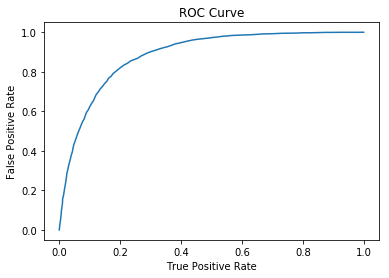

Training set areaUnderROC: 0.884909242115


In [27]:
import matplotlib.pyplot as plt
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

**Precision and recall.**

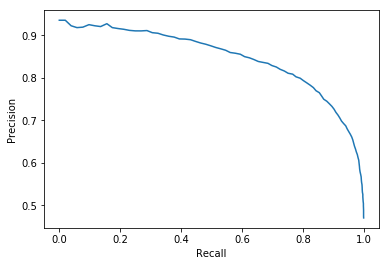

In [28]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**Make predictions on the test set.**

In [29]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 37|management|  0.0|[1.19871810716723...|       0.0|[0.76829666339830...|
| 40|management|  0.0|[2.20534940465796...|       0.0|[0.90072886169926...|
| 53|management|  0.0|[1.02590348276690...|       0.0|[0.73612093009497...|
| 32|management|  0.0|[1.25795481657702...|       0.0|[0.77867383994058...|
| 54|management|  0.0|[1.33232096924268...|       0.0|[0.79122429116078...|
| 40|management|  0.0|[1.57095096412779...|       0.0|[0.82791913346617...|
| 56|management|  0.0|[3.06095963426752...|       0.0|[0.95525333386804...|
| 50|management|  0.0|[-0.8102603273804...|       1.0|[0.30783502428597...|
| 47|management|  0.0|[0.67024288891379...|       0.0|[0.66155754396054...|
| 44|management|  0.0|[1.29756265761715...|       0.0|[0.78542449653716...|
+---+-------

## Evaluate our Logistic Regression model.

In [30]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

('Test Area Under ROC', 0.8858324614449619)


## Decision Tree Classifier
Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multi-class classification, do not require feature scaling, and are able to capture non-linearities and feature interactions.

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------+----------+--------------------+
|age|       job|label| rawPrediction|prediction|         probability|
+---+----------+-----+--------------+----------+--------------------+
| 37|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 40|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 53|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 32|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 54|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 40|management|  0.0|  [373.0,30.0]|       0.0|[0.92555831265508...|
| 56|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 50|management|  0.0|[788.0,1230.0]|       1.0|[0.39048562933597...|
| 47|management|  0.0|[788.0,1230.0]|       1.0|[0.39048562933597...|
| 44|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
+---+----------+-----+--------------+----------+--------------------+
only showing top 10 

#### Evaluate our Decision Tree model.

In [32]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.780724005007


One simple decision tree performed poorly because it is too weak given the range of different features. The prediction accuracy of decision trees can be improved by Ensemble methods, such as Random Forest and Gradient-Boosted Tree.

### Random Forest Classifier

In [33]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 37|management|  0.0|[13.7684085682463...|       0.0|[0.68842042841231...|
| 40|management|  0.0|[15.8223745371936...|       0.0|[0.79111872685968...|
| 53|management|  0.0|[13.1702598030275...|       0.0|[0.65851299015137...|
| 32|management|  0.0|[14.1919959887199...|       0.0|[0.70959979943599...|
| 54|management|  0.0|[14.6398539567788...|       0.0|[0.73199269783894...|
| 40|management|  0.0|[14.0699607906075...|       0.0|[0.70349803953037...|
| 56|management|  0.0|[18.2300150701502...|       0.0|[0.91150075350751...|
| 50|management|  0.0|[5.87833809369094...|       1.0|[0.29391690468454...|
| 47|management|  0.0|[9.42210757136227...|       1.0|[0.47110537856811...|
| 44|management|  0.0|[11.9323409071916...|       0.0|[0.59661704535958...|
+---+-------

#### Evaluate our Random Forest Classifier.

In [34]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.882371041465
